In [1]:
# ---- Libraries -----

from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ---- Parameters: test 1 -----

# File name
#filename = "test1"
#filename = "test2"
#filename = "test3"
filename = "test4"

# Diffusion
#components_D = [[0.01, 0], [0, 0.01]]
#components_D = [[0.01, 0], [0, 0]]
#components_D = [[0, 0], [0, 0.01]]
components_D = [[0.01, 0.01], [0, 0.01]]

# Time
t0 = 0              # Initial time
T = 10              # Period
num_steps = 50      # number of time steps
dt = T / num_steps  # time step size

# Geometry
nx = ny = np.power(2,6)

# Functional space
p = 1               # polynomial degree 

# Stabilization
alpha = 3

# Initial datum
u0 = Expression('exp(-20*(x[0]-0.5)*(x[0]-0.5) - 20*(x[1]-0.5)*(x[1]-0.5))', degree = p) # bump

# Neumann boundary condition
gN = Expression('0*x[1]', degree = p)

In [3]:
# ---- Computations ----

# Diffusion tensor
D = as_matrix(components_D)
norm_D = np.linalg.norm(np.matrix(components_D))

# Create mesh and define function space
hx = 1/nx
hy = 1/ny
h = sqrt(hx*hx + hy*hy)     # square's diagonal (diam(elem))
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, "DG", p)

# DG stabilization coefficient
sigma = norm_D + p*p/h*alpha

# Projection of u_0 on V
u0h = interpolate(u0, V)

In [4]:
# ---- Variational problem ----

# Solution
u_n = u0h
u = TrialFunction(V)

# Test function
v = TestFunction(V)

# Outer normal
n = FacetNormal(mesh)

# DG bilinear form
B = inner(D*grad(u), grad(v))*dx - inner(avg(D*grad(u)), jump(v, n))*dS -\
    inner(avg(D*grad(v)), jump(u, n))*dS +\
    sigma*inner(jump(u, n), jump(v, n))*dS

# Final problem
a = u*v*dx + dt*B - dt*(1-u_n)*u*v*dx 
F = u_n*v*dx + gN*v*ds

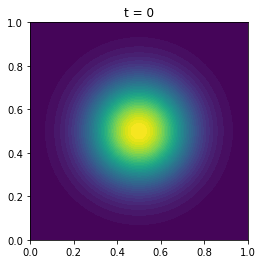

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


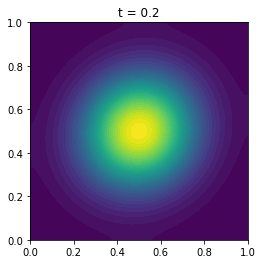

Solving linear variational problem.


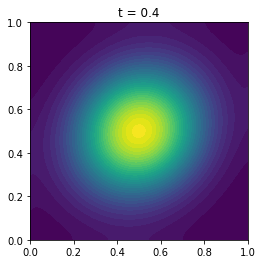

Solving linear variational problem.


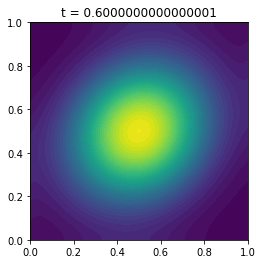

Solving linear variational problem.


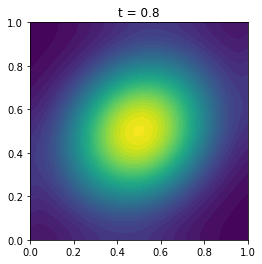

Solving linear variational problem.


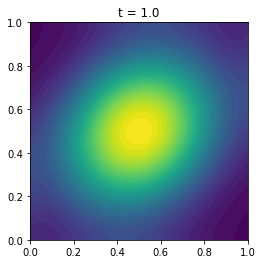

Solving linear variational problem.


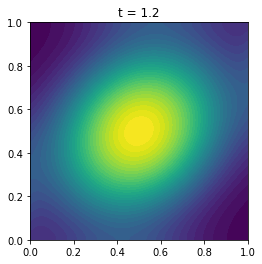

Solving linear variational problem.


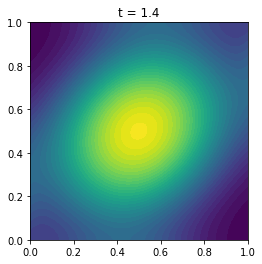

Solving linear variational problem.


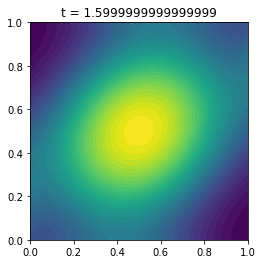

Solving linear variational problem.


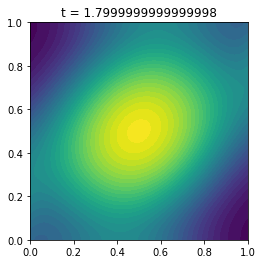

Solving linear variational problem.


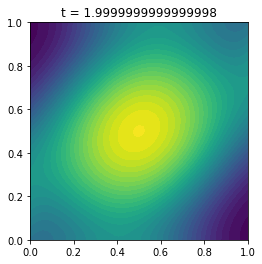

Solving linear variational problem.


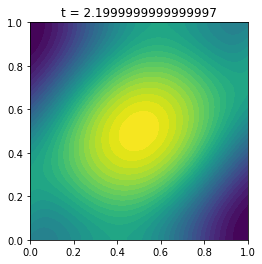

Solving linear variational problem.


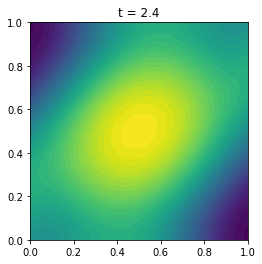

Solving linear variational problem.


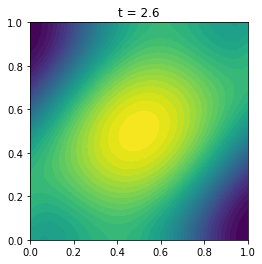

Solving linear variational problem.


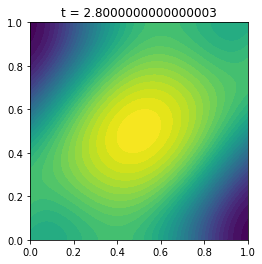

Solving linear variational problem.


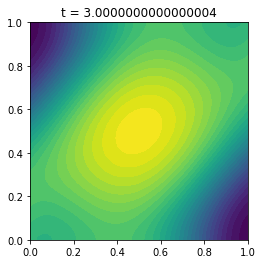

Solving linear variational problem.


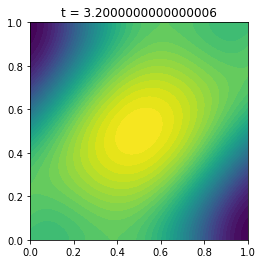

Solving linear variational problem.


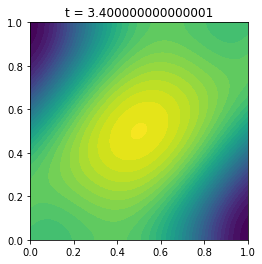

Solving linear variational problem.


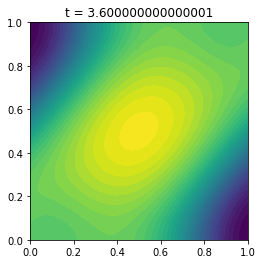

Solving linear variational problem.


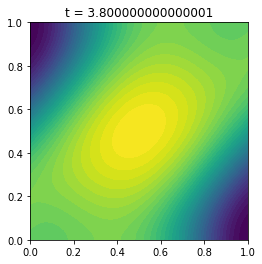

Solving linear variational problem.


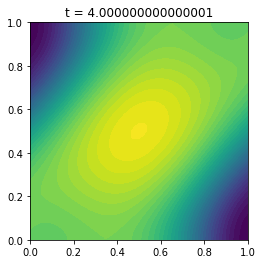

Solving linear variational problem.


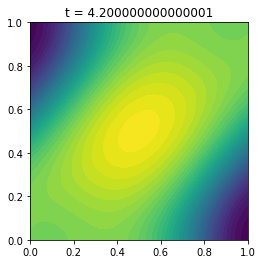

Solving linear variational problem.


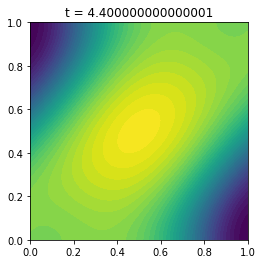

Solving linear variational problem.


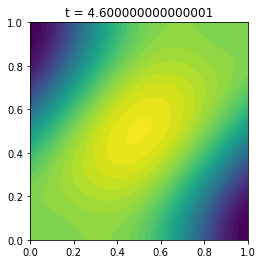

Solving linear variational problem.


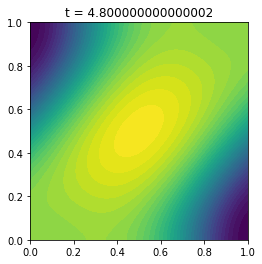

Solving linear variational problem.


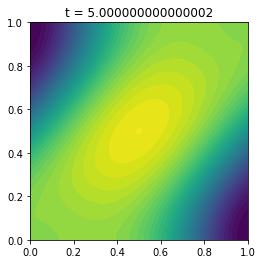

Solving linear variational problem.


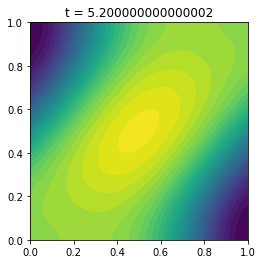

Solving linear variational problem.


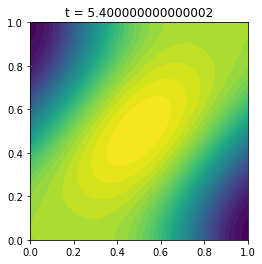

Solving linear variational problem.


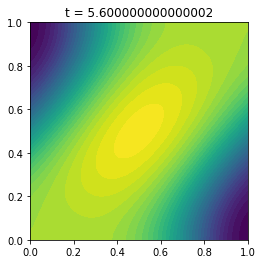

Solving linear variational problem.


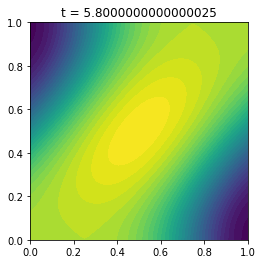

Solving linear variational problem.


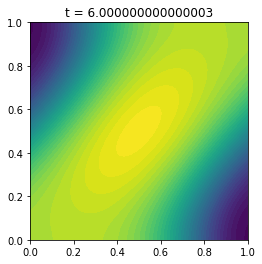

Solving linear variational problem.


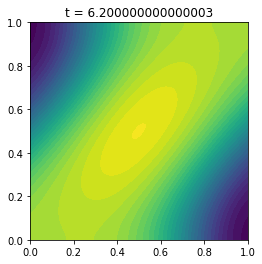

Solving linear variational problem.


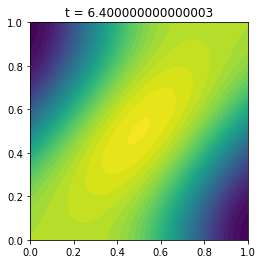

Solving linear variational problem.


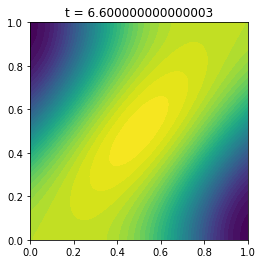

Solving linear variational problem.


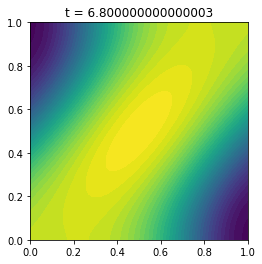

Solving linear variational problem.


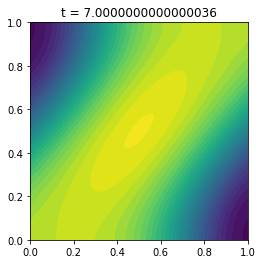

Solving linear variational problem.


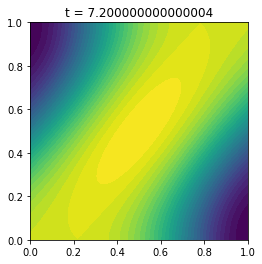

Solving linear variational problem.


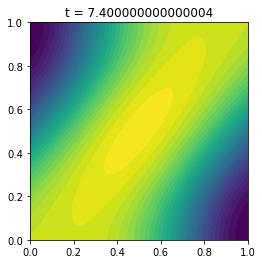

Solving linear variational problem.


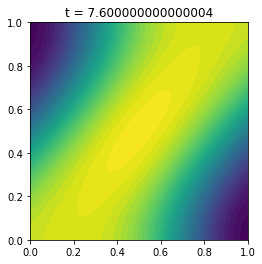

Solving linear variational problem.


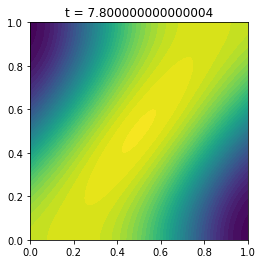

Solving linear variational problem.


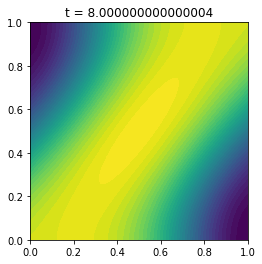

Solving linear variational problem.


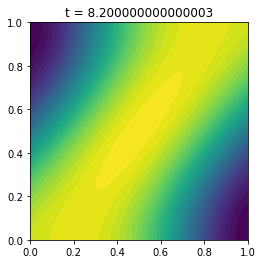

Solving linear variational problem.


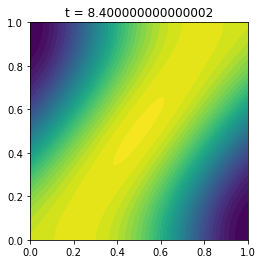

Solving linear variational problem.


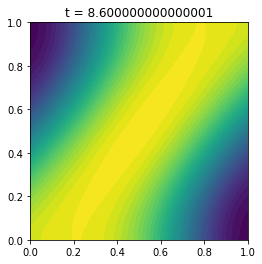

Solving linear variational problem.


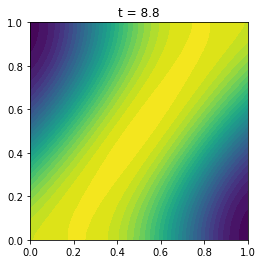

Solving linear variational problem.


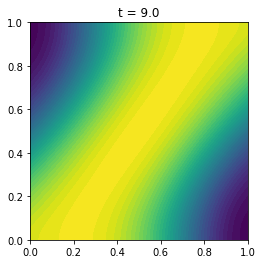

Solving linear variational problem.


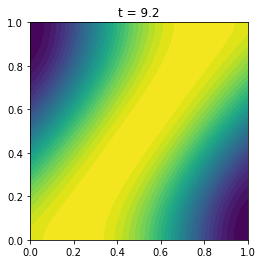

Solving linear variational problem.


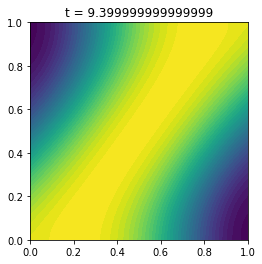

Solving linear variational problem.


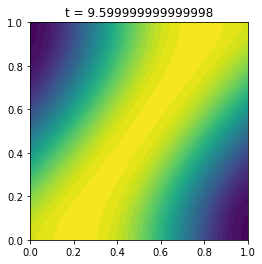

Solving linear variational problem.


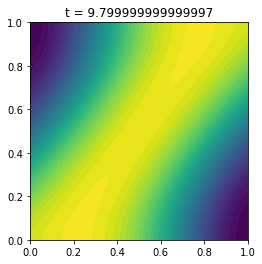

Solving linear variational problem.


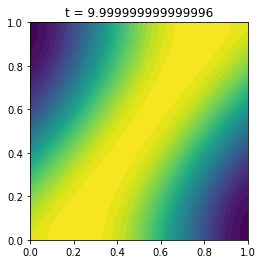

In [5]:
# ---- Time-stepping ----

u = Function(V)

# Initial time
t = t0

# Create VTK file for saving solution
vtkfile = File('solutions/' + filename + '/' + filename +'.pvd')

for n in range(num_steps):
    
    # Plot solution
    vtkfile << (u_n, t)
    plot(u_n, title = 't = ' +str(t))
    plt.show()
    
    # Update current time
    t += dt

    # Compute solution
    solve(a == F, u)

    # Update previous solution
    u_n.assign(u)
    
# Plot solution
vtkfile << (u_n, t)
plot(u_n, title = 't = ' +str(t))
plt.show()
